In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
df = pd.read_csv("Iris.csv")
df.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [56]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [57]:
df.duplicated().sum()

0

In [58]:
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [59]:
df = df.drop_duplicates()


In [60]:
df.drop(columns="Id", inplace=True)

In [61]:
X = df. iloc[:, :-1] # Features: sepal length, sepal width, petal length, petal width
y = df.iloc[:, -1] # Target: species (0 - Setosa, 1 - Versicolour, 2 - Virginica)

In [62]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [64]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
118,7.7,2.6,6.9,2.3,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa


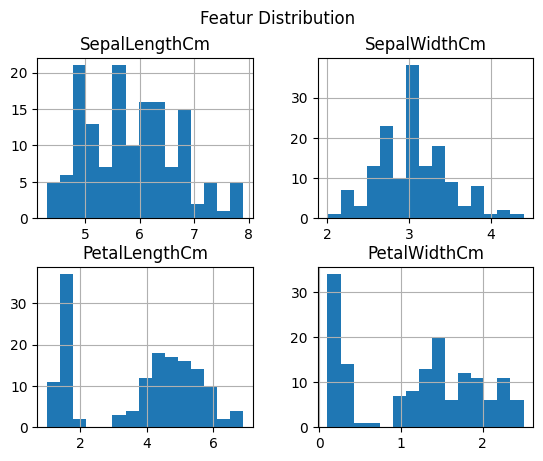

In [65]:
X.hist(bins=15, layout=(2,2))
plt.suptitle("Featur Distribution")
plt.show()

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [69]:
y_pred = lda.predict(X_test)

In [70]:
print (f"Accuracy: {accuracy_score(y_test, y_pred)}")
print (f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print (f"Classification Report:In {classification_report(y_test, y_pred, target_names=y.unique())}")

Accuracy: 1.0
Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Classification Report:In                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [71]:
# Example
sample = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
predicted_species = lda. predict (sample)
print(f"Predicted Species: {predicted_species [0]}")

Predicted Species: Iris-versicolor


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(
